In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [2]:
from sklearn.linear_model import LogisticRegression
n_labeled = 50
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train[:n_labeled], y_train[:n_labeled])

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [3]:
logreg.score(X_test, y_test)

0.7581863979848866

In [5]:
from sklearn.cluster import KMeans
import numpy as np

k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
digits_idx =np.argmin(X_digits_dist, axis=0)
X_rep_digits = X_train[digits_idx]

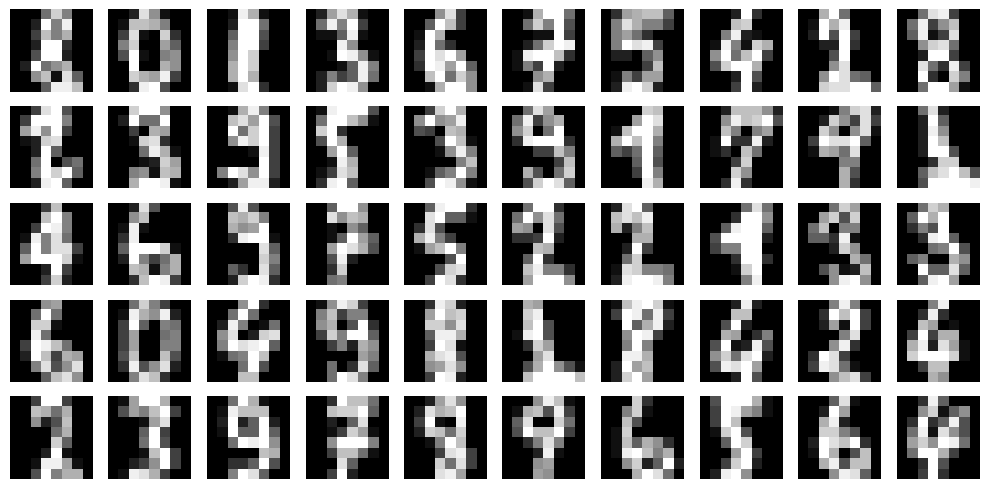

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(k):
    plt.subplot(5, 10, i + 1)
    plt.imshow(X_rep_digits[i].reshape(8,8), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [18]:
y_rep_digits = np.array([8,0,1,3,6,7,5,4,1,8,2,3,9,5,3,9,1,7,4,1,4,6,9,7,5,2,2,1,3,3,6,0,4,9,8,1,8,4,2,4,1,3,9,7,8,9,6,5,6,4])

In [19]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_rep_digits, y_rep_digits)
log_reg.score(X_test, y_test)

0.8110831234256927

### Label Propagation

In [20]:
y_trained_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_trained_propagated[kmeans.labels_ == i] = y_rep_digits[i]

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_trained_propagated)
log_reg.score(X_test, y_test)

/Users/samgrant/Desktop/AI_Projects/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8413098236775819

In [22]:
percentile_closest = 99
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_dist = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_dist)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_trained_propagated[partially_propagated]

In [23]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8312342569269522